# Define & clean outliers

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy. stats import lognorm
import seaborn as sns
import math

In [14]:
#create dataframe
#generate log-normal distributed random variable with 1000 values
df = pd.DataFrame({'values': lognorm.rvs(s=1, scale=math.exp(1), size= 1000)})

In [15]:
#get statistics
df.describe()

,values
count,1000.000000
mean,4.621844
std,6.968159
min,0.112500
25%,1.354671
50%,2.570723
75%,5.260630
max,123.249210


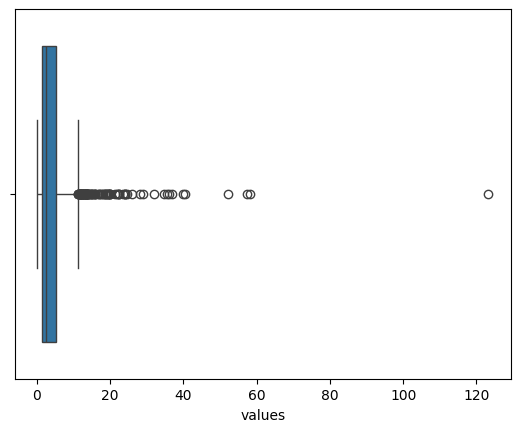

In [16]:
#create box plot
sns.boxplot(x=df['values'])
plt.show()

In [17]:
#define quartiles
q1, q3 = np.percentile(df['values'], [25, 75])
print(q1, q3)

1.3546708999675248 5.260630146231249


In [18]:
#define interquartile range
IQR = q3 - q1
print(IQR)

3.9059592462637243


In [19]:
#calculate outlairs range
outlairs_range = IQR * 1.5
upper_range, bottom_range = q3 + outlairs_range, q1 - outlairs_range
print(bottom_range, upper_range)

-4.504267969428062 11.119569015626837


In [20]:
#get rid of outlairs
df_clean = df.query('values < @upper_range and values > @bottom_range')

C:\Users\IgIgnatov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


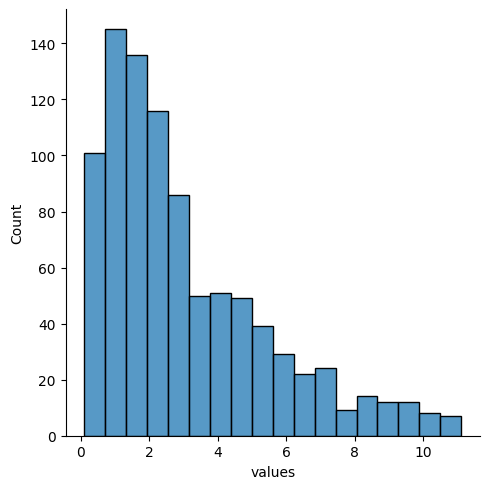

In [23]:
#Check clean data using hist and box plot
#create a histogramm
sns_plot = sns.displot(df_clean['values'])

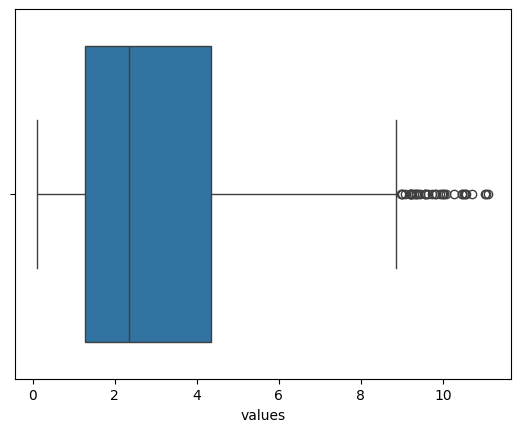

In [24]:
#create box plot
sns.boxplot(x=df_clean['values'])
plt.show()